In [1]:
import tensorflow as tf
from tensorflow_probability import distributions as tfd

2022-06-01 16:12:49.030034: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-01 16:12:49.030074: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from bernstein_flow.distributions import BernsteinFlow
from bernstein_flow.activations import get_thetas_constrain_fn
from bernstein_flow.util.visualization import plot_flow

In [3]:
tf.random.set_seed(1)
params_unconstrained = tf.concat([
    # a1, b2, a4 , thetas
    [0.6, 1, 0.2],tf.random.uniform([20],-1,0.5)],0)

2022-06-01 16:12:57.455175: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-01 16:12:57.455225: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-01 16:12:57.455257: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (manjaro-tp): /proc/driver/nvidia/version does not exist
2022-06-01 16:12:57.455695: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


/home/work/mambaforge/envs/tfp13/lib/python3.8/site-packages/matplotlib/patches.py:4619: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy = np.array(xy)
/home/work/mambaforge/envs/tfp13/lib/python3.8/site-packages/matplotlib/patches.py:4619: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy = np.array(xy)


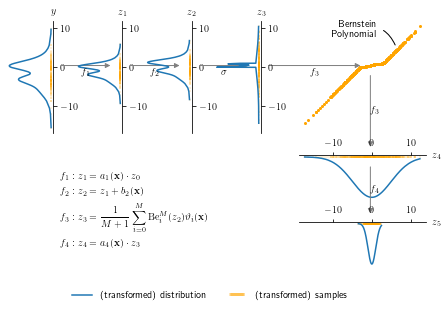

In [4]:
flow = BernsteinFlow.from_pvector(params_unconstrained)
fig=plot_flow(flow)

/home/work/mambaforge/envs/tfp13/lib/python3.8/site-packages/matplotlib/patches.py:4619: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy = np.array(xy)


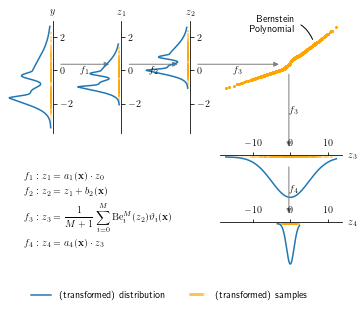

In [5]:
flow = BernsteinFlow.from_pvector(
    params_unconstrained,
    extrapolation="linear",
    clip_to_bernstein_domain=False, # No Sigmoid,
    thetas_constrain_fn=get_thetas_constrain_fn(
        constrain_second_drivative='zero' # ensure smooth derivative
    ),
)
fig=plot_flow(flow)

/home/work/mambaforge/envs/tfp13/lib/python3.8/site-packages/matplotlib/patches.py:4619: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy = np.array(xy)


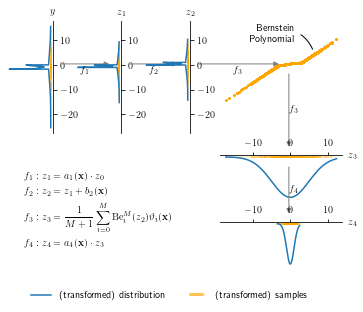

In [6]:
flow = BernsteinFlow.from_pvector(
    params_unconstrained,
    extrapolation="quadractic",
    clip_to_bernstein_domain=False, # No Sigmoid,
    thetas_constrain_fn=get_thetas_constrain_fn(
        constrain_second_drivative='turn' # ensure smooth derivative
    ),
)
fig=plot_flow(flow)

/home/work/mambaforge/envs/tfp13/lib/python3.8/site-packages/matplotlib/patches.py:4619: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy = np.array(xy)


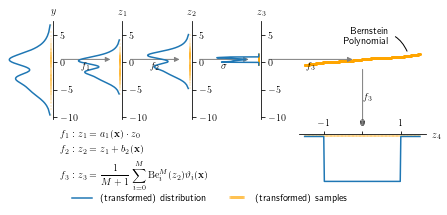

In [14]:
flow = BernsteinFlow.from_pvector(
    params_unconstrained,
    base_distribution=tfd.Uniform(-1,1),
    #clip_to_bernstein_domain=False, # No Sigmoid,
    scale_base_distribution=False,
    thetas_constrain_fn=get_thetas_constrain_fn(
        support=(-1, 1), # stay inside support
    ),
)
fig=plot_flow(flow, z_values = tf.linspace(-1.5,1.5, 200))

/home/work/mambaforge/envs/tfp13/lib/python3.8/site-packages/matplotlib/patches.py:4619: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy = np.array(xy)
/home/work/mambaforge/envs/tfp13/lib/python3.8/site-packages/matplotlib/patches.py:4619: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy = np.array(xy)
/home/work/mambaforge/envs/tfp13/lib/python3.8/site-packages/matplotlib/patches.py:4619: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or sh

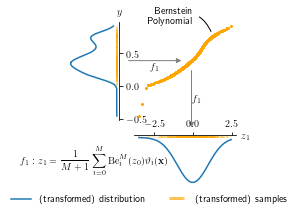

In [20]:
flow = BernsteinFlow.from_pvector(
    params_unconstrained,
    clip_to_bernstein_domain=False, # No Sigmoid,
    scale_data=False,
    shift_data=False,
    scale_base_distribution=False,
    thetas_constrain_fn=get_thetas_constrain_fn(
        #support=False, # stay inside support
    ),
)
fig=plot_flow(flow)